In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('nubank.csv')

In [4]:
df = df.iloc[:, ::3]

In [5]:
df

,date,amount
0,2023-03-08,9.94
1,2023-03-08,246.81
2,2023-03-08,288.68
3,2023-03-08,8.92
4,2023-03-10,12.76
5,2023-03-10,0.69
6,2023-03-11,7.98
7,2023-03-11,7.98
8,2023-03-11,29.94
9,2023-03-12,80.00


In [6]:
from prophet import Prophet

In [7]:
df = df.rename(columns={"date": "ds", "amount": "y"})

In [8]:
df

,ds,y
0,2023-03-08,9.94
1,2023-03-08,246.81
2,2023-03-08,288.68
3,2023-03-08,8.92
4,2023-03-10,12.76
5,2023-03-10,0.69
6,2023-03-11,7.98
7,2023-03-11,7.98
8,2023-03-11,29.94
9,2023-03-12,80.00


In [9]:
#começando a previsão

In [11]:
m = Prophet()
m.fit(df)

13:53:54 - cmdstanpy - INFO - Chain [1] start processing
13:53:54 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
74,2023-06-02
75,2023-06-03
76,2023-06-04
77,2023-06-05
78,2023-06-06


In [15]:
forecast = m.predict(future)
df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
#vamos fazer uma melhoria

In [24]:
df['yhat'] = df['yhat'].map('{:.2f}'.format)

C:\Users\55449\AppData\Local\Temp\ipykernel_22272\601744849.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df['yhat_lower'] = df['yhat_lower'].map('{:.2f}'.format)
df['yhat_upper'] = df['yhat_upper'].map('{:.2f}'.format)

C:\Users\55449\AppData\Local\Temp\ipykernel_22272\3405403460.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\55449\AppData\Local\Temp\ipykernel_22272\3405403460.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df = df

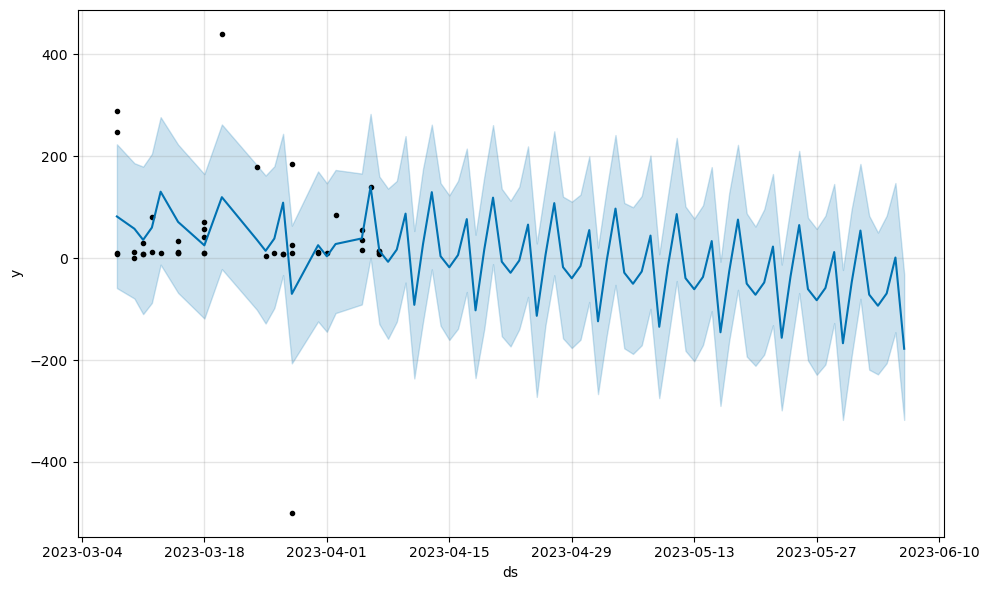

In [28]:
fig1 = m.plot(forecast)

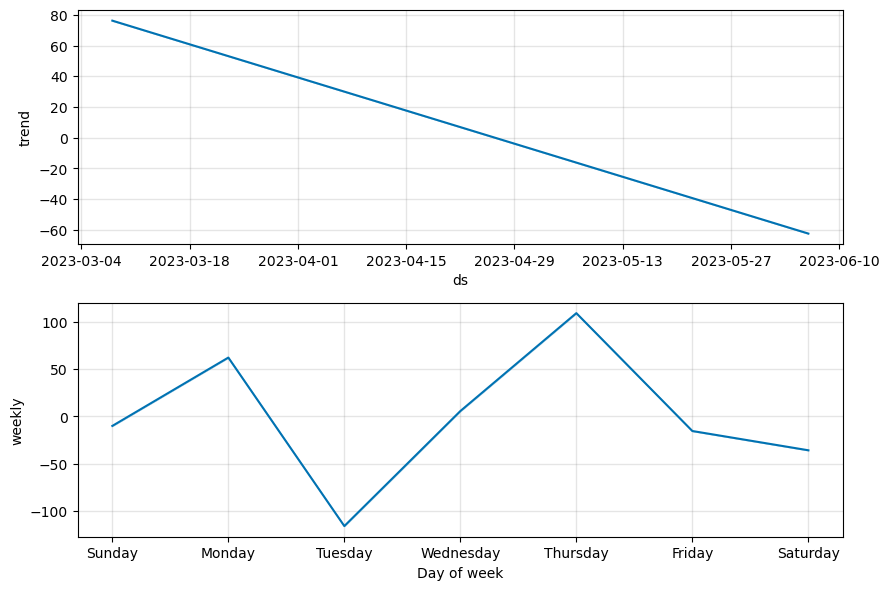

In [29]:
fig2 = m.plot_components(forecast)

In [30]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [31]:
plot_components_plotly(m, forecast)

# PASSANDO O DF PARA PDF
Primeiramente é preciso baixar wkhtmltopdf no computador pelo link https://wkhtmltopdf.org/downloads.html

Depois colocar o arquivo wkhtmltopdf na mesma pasta que o main.py

Depois eu passei para html 

In [40]:
nome_arquivo = df.to_html()

In [43]:
# salvar o HTML em um arquivo
with open('arquivo.html', 'w') as arquivo:
    arquivo.write(nome_arquivo)

Instalei pip install pdfkit

In [33]:
pip install pdfkit

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pdfkit

options = {
    'page-size': 'Letter',
    'margin-top': '0.75in',
    'margin-right': '0.75in',
    'margin-bottom': '0.75in',
    'margin-left': '0.75in',
    'encoding': 'UTF-8'
}

pdfkit.from_file('arquivo.html', 'arquivo.pdf', options=options)

True

In [39]:
df

,ds,yhat,yhat_lower,yhat_upper
0,2023-03-08,81.90,-58.79,223.62
1,2023-03-10,57.80,-79.21,186.52
2,2023-03-11,35.96,-109.88,179.76
3,2023-03-12,60.09,-87.86,204.75
4,2023-03-13,130.54,-12.77,276.88
...,...,...,...,...
74,2023-06-02,-71.55,-218.97,83.25
75,2023-06-03,-93.39,-228.21,50.28
76,2023-06-04,-69.26,-206.28,83.51
77,2023-06-05,1.19,-145.35,147.57
